In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial import distance

import src.data.NHLDataManager as DataManager
data_manager = DataManager.NHLDataManager()

In [5]:
# Q2
distance_data = pd.DataFrame()
season_type = "Regular"
for season_year in [2015, 2016, 2017, 2018, 2019]:

    data_season_df = data_manager.get_season_dataframe(season_year=season_year, season_type=season_type)
    distance_data = pd.concat([distance_data, data_season_df[["Type", "st_X", "st_Y", "Empty Net"]]], ignore_index=True)



  0%|          | 0/1230 [00:00<?, ?it/s]

  0%|          | 0/1229 [00:00<?, ?it/s]

In [8]:
distance_data = distance_data.dropna()
distance_data.head(10)

,Type,st_X,st_Y,Empty Net
0,GOAL,63.0,-27.0,False
1,GOAL,-73.0,-1.0,False
2,GOAL,67.0,0.0,False
3,GOAL,52.0,4.0,True
66,GOAL,82.0,-21.0,False
67,GOAL,77.0,-2.0,False
68,GOAL,77.0,25.0,False
69,GOAL,80.0,-1.0,False
70,GOAL,70.0,3.0,False
127,GOAL,63.0,-28.0,False


In [9]:
goal_coordinates = np.array([89.,0.])
distance_data['distance'] = np.linalg.norm(distance_data.iloc[:,2:4] - goal_coordinates)), axis=1) # Goal is located at (89, 0)
distance_data.head(10)

,Type,st_X,st_Y,Empty Net,distance
0,GOAL,63.0,-27.0,False,116.000000
1,GOAL,-73.0,-1.0,False,90.000000
2,GOAL,67.0,0.0,False,89.000000
3,GOAL,52.0,4.0,True,85.005882
66,GOAL,82.0,-21.0,False,110.000000
67,GOAL,77.0,-2.0,False,91.000000
68,GOAL,77.0,25.0,False,64.000000
69,GOAL,80.0,-1.0,False,90.000000
70,GOAL,70.0,3.0,False,86.000000
127,GOAL,63.0,-28.0,False,117.000000


In [13]:
def angle_from_goal(x1, x2):
    return np.arctan2(np.cross(x1, x2), np.dot(x1, x2))

In [14]:
distance_data['distance'] = distance_data.apply(lambda x : distance_from_goal(x[['st_X', 'st_Y']].to_numpy(), goal_coordinates), axis=1)
distance_data['distance'] = np.linalg.norm( )


In [ ]:
distance_data['angle'] = distance_data.apply(lambda x : angle_from_goal(x[['st_X', 'st_Y']].to_numpy(), goal_coordinates), axis=1)

AttributeError: 'float' object has no attribute 'arctan2'

In [82]:
distance_data.head()

,Type,st_X,st_Y,distance
0,GOAL,87.0,-3.0,3.605551
1,GOAL,64.0,14.0,28.653098
2,GOAL,63.0,5.0,26.476405
3,GOAL,53.0,-7.0,36.674242
4,GOAL,74.0,4.0,15.524175


In [88]:
distance_data['st_X'].min()

-99.0

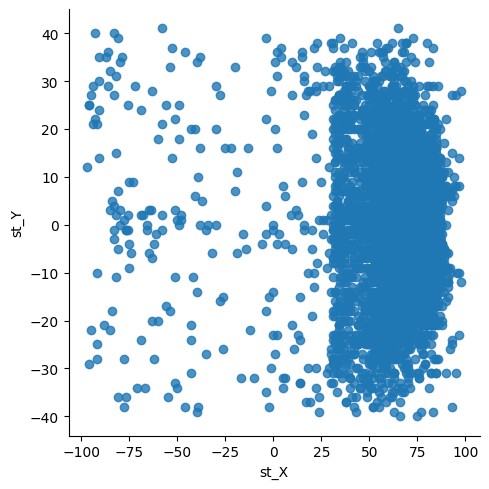

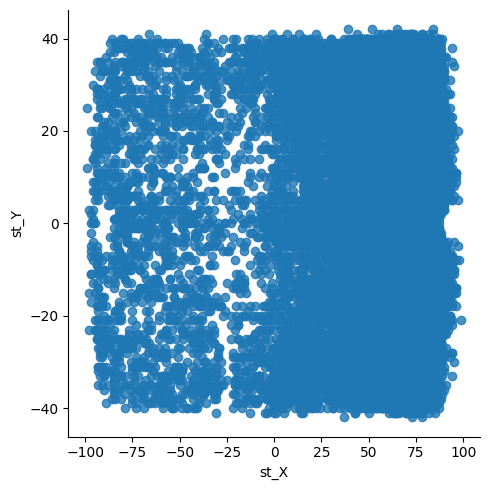

In [93]:
sns.lmplot(x='st_X', y='st_Y', data=distance_data.loc[distance_data['Type']=='GOAL'], fit_reg=False)
sns.lmplot(x='st_X', y='st_Y', data=distance_data.loc[distance_data['Type']=='SHOT'], fit_reg=False)
